# 임베딩

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import re
from wordcloud import WordCloud
from collections import Counter
from gensim import corpora, models
import gensim
from tqdm import tqdm

In [2]:
df = pd.read_csv("영어 크롤링.csv", encoding = "utf-8-sig")
df

,Date,Name,Score,Review,like
0,"January 26, 2020",Bernard Reis,1,Completely frustrating experience. Paid extra ...,7
1,"January 18, 2020",Gordon Inman,2,"Some good features, but this app isn't very sm...",8
2,"January 18, 2020",MrDurma,4,"This app works perfectly, it allowed us to dow...",2
3,"January 26, 2020",K Kostas,3,Good but not great for an app by LG. Not the m...,1
4,"January 17, 2020",Greg Evans,3,App is useful but limited and requires some up...,1
...,...,...,...,...,...
7145,"December 31, 2019",Mr Darryl Maurice Friend,5,Wonderful,0
7146,"January 12, 2020",luis arias,5,Wonderful,0
7147,"September 24, 2017",Tobiloba Bakare,5,Awesome 🌟 🌟 🌟 🌟,0
7148,"October 13, 2017",A Google user,5,Good Good Good,0


### 전처리

In [3]:
eng = re.compile("[^a-zA-Z]")
df["Review"] = df["Review"].apply(lambda x : x.lower())
df["Review"] = df["Review"].apply(lambda x : re.sub(eng, " ", x))

short = []
for a, i in enumerate(df["Review"]):
    if len(i) < 30:
        short.append(a)
    else:
        pass
    
df = df.drop(index = short).reset_index(drop = True)
    
df

,Date,Name,Score,Review,like
0,"January 26, 2020",Bernard Reis,1,completely frustrating experience paid extra ...,7
1,"January 18, 2020",Gordon Inman,2,some good features but this app isn t very sm...,8
2,"January 18, 2020",MrDurma,4,this app works perfectly it allowed us to dow...,2
3,"January 26, 2020",K Kostas,3,good but not great for an app by lg not the m...,1
4,"January 17, 2020",Greg Evans,3,app is useful but limited and requires some up...,1
...,...,...,...,...,...
4865,"October 2, 2017",repou Ltd,1,can t even open the app crashes,0
4866,"July 22, 2018",jayanth murli,5,it is well helpfull for my reference this appl...,0
4867,"May 29, 2018",Mukul,1,it s not installing showing a error,0
4868,"January 8, 2017",Jumar Ando,5,this is every usable apps tnx lg,0


In [4]:
df["token"] = df["Review"].apply(lambda x : word_tokenize(x))

stop_words = set(stopwords.words("english"))
token = []
for i in df["token"]:
    tok = []
    for word in i:
        if word not in stop_words:
            tok.append(word)
    token.append(tok)
df["token"] = token
df

,Date,Name,Score,Review,like,token
0,"January 26, 2020",Bernard Reis,1,completely frustrating experience paid extra ...,7,"[completely, frustrating, experience, paid, ex..."
1,"January 18, 2020",Gordon Inman,2,some good features but this app isn t very sm...,8,"[good, features, app, smart, would, think, con..."
2,"January 18, 2020",MrDurma,4,this app works perfectly it allowed us to dow...,2,"[app, works, perfectly, allowed, us, download,..."
3,"January 26, 2020",K Kostas,3,good but not great for an app by lg not the m...,1,"[good, great, app, lg, user, interface, friend..."
4,"January 17, 2020",Greg Evans,3,app is useful but limited and requires some up...,1,"[app, useful, limited, requires, updates, wifi..."
...,...,...,...,...,...,...
4865,"October 2, 2017",repou Ltd,1,can t even open the app crashes,0,"[even, open, app, crashes]"
4866,"July 22, 2018",jayanth murli,5,it is well helpfull for my reference this appl...,0,"[well, helpfull, reference, application, good,..."
4867,"May 29, 2018",Mukul,1,it s not installing showing a error,0,"[installing, showing, error]"
4868,"January 8, 2017",Jumar Ando,5,this is every usable apps tnx lg,0,"[every, usable, apps, tnx, lg]"


In [5]:
# lemmatizer vs. stemmer

# nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

print([lemmatizer.lemmatize(word) for word in df["token"][0]])
print(" ")
print([stemmer.stem(word) for word in df["token"][0]])

['completely', 'frustrating', 'experience', 'paid', 'extra', 'money', 'get', 'air', 'conditioner', 'connectivity', 'work', 'time', 'try', 'use', 'get', 'connect', 'device', 'take', 'le', 'minute', 'get', 'disconnected', 'tried', 'reinstalling', 'app', 'cleared', 'cache', 'reset', 'router', 'replaced', 'router', 'nothing', 'work', 'completely', 'frustrated']
 
['complet', 'frustrat', 'experi', 'paid', 'extra', 'money', 'get', 'air', 'condition', 'connect', 'work', 'time', 'tri', 'use', 'get', 'connect', 'devic', 'take', 'less', 'minut', 'get', 'disconnect', 'tri', 'reinstal', 'app', 'clear', 'cach', 'reset', 'router', 'replac', 'router', 'noth', 'work', 'complet', 'frustrat']


In [6]:
# applying stemming
df["token"] = df["token"].apply(lambda x : [stemmer.stem(word) for word in x])
df

,Date,Name,Score,Review,like,token
0,"January 26, 2020",Bernard Reis,1,completely frustrating experience paid extra ...,7,"[complet, frustrat, experi, paid, extra, money..."
1,"January 18, 2020",Gordon Inman,2,some good features but this app isn t very sm...,8,"[good, featur, app, smart, would, think, conne..."
2,"January 18, 2020",MrDurma,4,this app works perfectly it allowed us to dow...,2,"[app, work, perfectli, allow, us, download, ma..."
3,"January 26, 2020",K Kostas,3,good but not great for an app by lg not the m...,1,"[good, great, app, lg, user, interfac, friendl..."
4,"January 17, 2020",Greg Evans,3,app is useful but limited and requires some up...,1,"[app, use, limit, requir, updat, wifi, setup, ..."
...,...,...,...,...,...,...
4865,"October 2, 2017",repou Ltd,1,can t even open the app crashes,0,"[even, open, app, crash]"
4866,"July 22, 2018",jayanth murli,5,it is well helpfull for my reference this appl...,0,"[well, helpful, refer, applic, good, applic]"
4867,"May 29, 2018",Mukul,1,it s not installing showing a error,0,"[instal, show, error]"
4868,"January 8, 2017",Jumar Ando,5,this is every usable apps tnx lg,0,"[everi, usabl, app, tnx, lg]"


### word cloud

In [7]:
words = []
for i in df["token"]:
    for w in i:
        words.append(w)
words

['complet',
 'frustrat',
 'experi',
 'paid',
 'extra',
 'money',
 'get',
 'air',
 'condition',
 'connect',
 'work',
 'time',
 'tri',
 'use',
 'get',
 'connect',
 'devic',
 'take',
 'less',
 'minut',
 'get',
 'disconnect',
 'tri',
 'reinstal',
 'app',
 'clear',
 'cach',
 'reset',
 'router',
 'replac',
 'router',
 'noth',
 'work',
 'complet',
 'frustrat',
 'good',
 'featur',
 'app',
 'smart',
 'would',
 'think',
 'connect',
 'devic',
 'would',
 'give',
 'ui',
 'ux',
 'specif',
 'devic',
 'connect',
 'new',
 'stove',
 'oven',
 'imag',
 'use',
 'repres',
 'stove',
 'match',
 'stovetop',
 'burner',
 'layout',
 'direct',
 'oven',
 'remot',
 'start',
 'written',
 'gener',
 'tri',
 'fit',
 'product',
 'look',
 'see',
 'would',
 'put',
 'effort',
 'person',
 'experi',
 'devic',
 'purchas',
 'rate',
 'higher',
 'app',
 'work',
 'perfectli',
 'allow',
 'us',
 'download',
 'mani',
 'cycl',
 'washer',
 'dryer',
 'realli',
 'cool',
 'featur',
 'problem',
 'one',
 'thing',
 'kind',
 'bother',
 'power

In [8]:
text = nltk.Text(words, name='app')
len(text)

79782

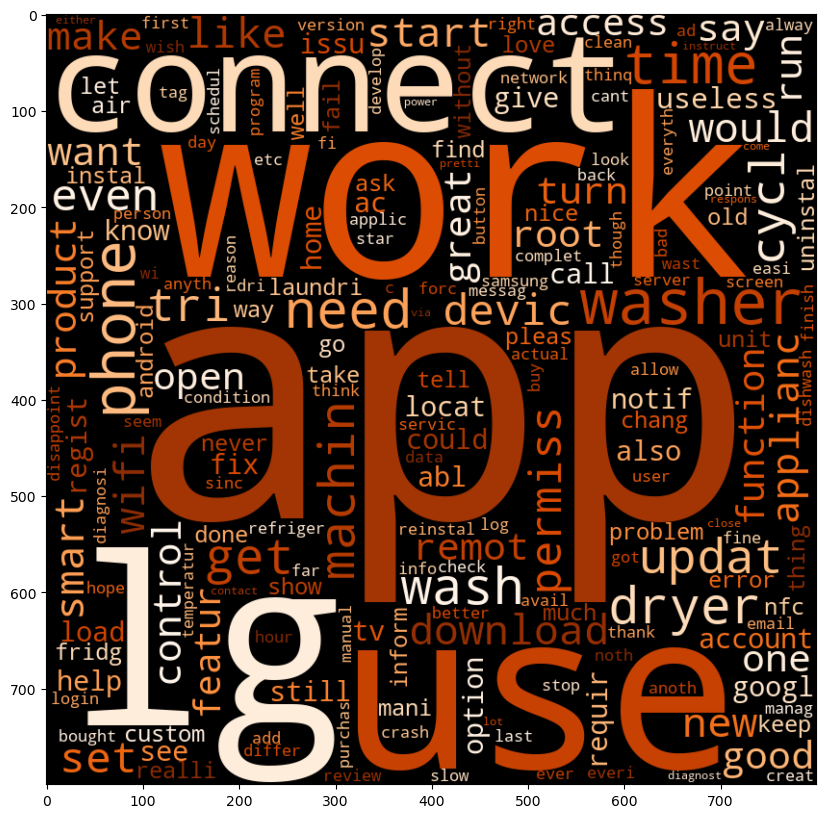

In [9]:
wordclouds = WordCloud(width = 800, height = 800,
                       background_color = 'Black', colormap = 'Oranges')

count = Counter(text)
wordclouds = wordclouds.generate_from_frequencies(count)
array = wordclouds.to_array()
fig = plt.figure(figsize=(10,10))
plt.imshow(array, interpolation = 'bilinear') #interpolation는 이미지를 어떻게 처리해서 보여줄지를 결정합니다. bilinear은 부드럽게 보여주기, none|None은 이미지를 있는 그대로 보여줍니다.
plt.show()

In [10]:
# 빈도 수 확인
count

Counter({'complet': 136,
         'frustrat': 59,
         'experi': 49,
         'paid': 34,
         'extra': 49,
         'money': 58,
         'get': 589,
         'air': 173,
         'condition': 117,
         'connect': 1089,
         'work': 1602,
         'time': 754,
         'tri': 508,
         'use': 1283,
         'devic': 456,
         'take': 167,
         'less': 42,
         'minut': 68,
         'disconnect': 62,
         'reinstal': 116,
         'app': 3962,
         'clear': 39,
         'cach': 10,
         'reset': 53,
         'router': 60,
         'replac': 33,
         'noth': 148,
         'good': 325,
         'featur': 287,
         'smart': 417,
         'would': 404,
         'think': 107,
         'give': 248,
         'ui': 31,
         'ux': 9,
         'specif': 23,
         'new': 401,
         'stove': 14,
         'oven': 62,
         'imag': 11,
         'repres': 2,
         'match': 15,
         'stovetop': 1,
         'burner': 1,
         'l

In [11]:
#순서대로 정렬하기
keys = []
values =[]
for i in list(dict(count).keys()):
    keys.append(i)
for i in list(dict(count).values()):
    values.append(i)
bindo = {"word" : keys, "count" : values}
bindo = pd.DataFrame(bindo)
bindo = bindo.sort_values(by = ["count"], ascending = False)
bindo

,word,count
20,app,3962
10,work,1602
89,lg,1452
13,use,1283
9,connect,1089
...,...,...
2965,veryy,1
2966,recip,1
2967,born,1
2968,child,1


### tf-idf

In [12]:
text_imsi = nltk.Text(df["token"][0], name='app')
cnt = dict(Counter(text_imsi))

for i in cnt.keys():
    tf = cnt[i]
    
    num = 0
    for w in df["token"]:
        if i in w:
            num += 1
    
    idf = np.log(len(df.index)/(1 + num))
    print(i, "의 tfidf 점수: ", tf*idf)

complet 의 tfidf 점수:  7.2776379043140365
frustrat 의 tfidf 점수:  8.860812411060433
experi 의 tfidf 점수:  4.640701614366577
paid 의 tfidf 점수:  4.994341654610155
extra 의 tfidf 점수:  4.6622078195875405
money 의 tfidf 점수:  4.447797948242085
get 의 tfidf 점수:  6.728419024704619
air 의 tfidf 점수:  3.5350221584753747
condition 의 tfidf 점수:  3.926501024608799
connect 의 tfidf 점수:  3.5851623239224453
work 의 tfidf 점수:  2.666227463653458
time 의 tfidf 점수:  2.0435433535354224
tri 의 tfidf 점수:  4.812699606002928
use 의 tfidf 점수:  1.5525647320596756
devic 의 tfidf 점수:  2.561260072686741
take 의 tfidf 점수:  3.4604112946842
less 의 tfidf 점수:  4.753179597793267
minut 의 tfidf 점수:  4.4304062055302165
disconnect 의 tfidf 점수:  4.447797948242085
reinstal 의 tfidf 점수:  3.7459170877133854
app 의 tfidf 점수:  0.6501427643272361
clear 의 tfidf 점수:  4.801969761962699
cach 의 tfidf 점수:  6.092953943278265
reset 의 tfidf 점수:  4.599028917966009
router 의 tfidf 점수:  9.198057835932017
replac 의 tfidf 점수:  5.056862011591489
noth 의 tfidf 점수:  3.57086

### LDA

In [9]:
lda = list(df["token"])

dictionary = corpora.Dictionary(lda)
corpus = [dictionary.doc2bow(text) for text in lda]

In [14]:
corpus[0:1]

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 2),
  (5, 1),
  (6, 2),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 2),
  (12, 3),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 2),
  (22, 1),
  (23, 1),
  (24, 2),
  (25, 1),
  (26, 2)]]

In [10]:
topic_num = 3
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = topic_num, id2word = dictionary)

In [11]:
#토픽당 단어의 갯수 5개
ldamodel.print_topics(num_words=5)

[(0, '0.055*"app" + 0.025*"work" + 0.024*"lg" + 0.019*"washer" + 0.017*"use"'),
 (1,
  '0.050*"app" + 0.021*"connect" + 0.020*"work" + 0.019*"lg" + 0.014*"phone"'),
 (2,
  '0.042*"app" + 0.020*"use" + 0.018*"permiss" + 0.014*"need" + 0.012*"wash"')]

In [12]:
#topic probability distribution
ldamodel.get_document_topics(corpus)[0]

[(0, 0.67596066), (1, 0.3139903), (2, 0.010048981)]

In [13]:
from gensim.models import CoherenceModel

coherence_model_lda = CoherenceModel(model=ldamodel, texts=lda, dictionary=dictionary,topn=10)
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

print('\nPerplexity: ', ldamodel.log_perplexity(corpus))

ERROR! Session/line number was not unique in database. History logging moved to new session 3021

Coherence Score:  0.49374037720268377

Perplexity:  -6.8075838857547035


In [ ]:
coherence_values = []
for i in tqdm(range(2,10)):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word = dictionary)
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=lda, dictionary=dictionary,topn=10) #상위 10개의 단어들을 이용하여 유사도를 알아본다.
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)
    
x = range(2,10)
plt.plot(x, coherence_values)
plt.xlabel("Number of topics")
plt.ylabel("Coherence score")
plt.show()

In [ ]:
perplexity_values = []
for i in tqdm(range(2,10)):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word = dictionary)
    perplexity_values.append(ldamodel.log_perplexity(corpus))

x = range(2,10)
plt.plot(x, perplexity_values)
plt.xlabel("Number of topics")
plt.ylabel("Perplexity score")
plt.show()

In [ ]:
# 토픽 개수 
topic_num = 6
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = topic_num, id2word = dictionary)

In [24]:
ldamodel.get_document_topics(corpus)[0]

[(5, 0.9766325)]

In [23]:
align = []
for i in ldamodel.get_document_topics(corpus):
    label = []
    value = []
    for w in i:
        label.append(w[0])
        value.append(w[1])
    align.append(label[np.argmax(value)])
align

[5,
 5,
 3,
 3,
 5,
 5,
 5,
 0,
 5,
 3,
 5,
 0,
 3,
 1,
 5,
 0,
 5,
 4,
 3,
 3,
 3,
 5,
 0,
 3,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 3,
 3,
 0,
 5,
 3,
 5,
 5,
 5,
 3,
 5,
 3,
 5,
 5,
 4,
 4,
 0,
 5,
 0,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 5,
 5,
 0,
 4,
 5,
 2,
 5,
 4,
 3,
 3,
 3,
 5,
 4,
 5,
 0,
 0,
 3,
 5,
 5,
 0,
 3,
 3,
 1,
 5,
 5,
 5,
 5,
 1,
 2,
 4,
 0,
 0,
 4,
 5,
 4,
 3,
 3,
 4,
 2,
 0,
 5,
 5,
 4,
 5,
 3,
 0,
 3,
 5,
 5,
 4,
 4,
 3,
 0,
 0,
 5,
 3,
 4,
 3,
 5,
 3,
 3,
 4,
 4,
 0,
 3,
 5,
 5,
 2,
 4,
 0,
 4,
 5,
 5,
 3,
 4,
 3,
 4,
 5,
 5,
 5,
 5,
 4,
 0,
 5,
 5,
 5,
 3,
 0,
 0,
 3,
 5,
 2,
 3,
 4,
 0,
 5,
 1,
 3,
 4,
 5,
 3,
 2,
 5,
 5,
 4,
 1,
 5,
 2,
 2,
 4,
 5,
 5,
 2,
 0,
 5,
 3,
 0,
 5,
 5,
 3,
 0,
 0,
 5,
 5,
 5,
 2,
 0,
 3,
 5,
 2,
 3,
 5,
 4,
 5,
 4,
 0,
 0,
 4,
 5,
 2,
 4,
 3,
 5,
 0,
 0,
 4,
 0,
 0,
 1,
 5,
 3,
 0,
 4,
 5,
 4,
 5,
 0,
 3,
 2,
 1,
 5,
 1,
 1,
 4,
 3,
 3,
 4,
 5,
 4,
 5,
 3,
 3,
 4,
 5,
 0,
 4,
 3,
 4,
 5,
 4,
 1,
 5,
 0,
 0,
 0,
 3,
 3,
 2,
 3,
 0,
 4,


In [25]:
df["lda"] = align
df

,Date,Name,Score,Review,like,token,lda
0,"January 26, 2020",Bernard Reis,1,completely frustrating experience paid extra ...,7,"[complet, frustrat, experi, paid, extra, money...",5
1,"January 18, 2020",Gordon Inman,2,some good features but this app isn t very sm...,8,"[good, featur, app, smart, would, think, conne...",5
2,"January 18, 2020",MrDurma,4,this app works perfectly it allowed us to dow...,2,"[app, work, perfectli, allow, us, download, ma...",3
3,"January 26, 2020",K Kostas,3,good but not great for an app by lg not the m...,1,"[good, great, app, lg, user, interfac, friendl...",3
4,"January 17, 2020",Greg Evans,3,app is useful but limited and requires some up...,1,"[app, use, limit, requir, updat, wifi, setup, ...",5
...,...,...,...,...,...,...,...
4865,"October 2, 2017",repou Ltd,1,can t even open the app crashes,0,"[even, open, app, crash]",3
4866,"July 22, 2018",jayanth murli,5,it is well helpfull for my reference this appl...,0,"[well, helpful, refer, applic, good, applic]",2
4867,"May 29, 2018",Mukul,1,it s not installing showing a error,0,"[instal, show, error]",4
4868,"January 8, 2017",Jumar Ando,5,this is every usable apps tnx lg,0,"[everi, usabl, app, tnx, lg]",3


### LDAvis

In [14]:
import pyLDAvis.gensim as gensimvis
import pyLDAvis
prepared_data = gensimvis.prepare(ldamodel, corpus, dictionary, n_jobs = 1)
pyLDAvis.display(prepared_data)
pyLDAvis.save_html(prepared_data, 'ldavis.html')

In [15]:
pyLDAvis.display(prepared_data)

In [16]:
gensim.__version__

'4.1.2'

In [17]:
pyLDAvis.__version__

'3.4.0'

### distributed representation

In [27]:
import gensim
from gensim.models.word2vec import Word2Vec
from gensim.models.doc2vec import TaggedDocument
from gensim.models import doc2vec

In [28]:
# word2vec
embedding_model = Word2Vec(df['token'], sg = True, window=2, min_count=3)

In [29]:
embedding_model.wv.most_similar("app")

[('easi', 0.948614239692688),
 ('diagnost', 0.9456668496131897),
 ('useless', 0.943899929523468),
 ('perfectli', 0.9428645372390747),
 ('well', 0.9423635601997375),
 ('older', 0.9416186809539795),
 ('properli', 0.9412001371383667),
 ('yet', 0.9409840703010559),
 ('exactli', 0.939303457736969),
 ('iphon', 0.9390992522239685)]

In [30]:
# doc2vec
tagged_corpus_list = []

for index, row in tqdm(df.iterrows()):
    text = row['token']
    tag = "document {}".format(index)
    tagged_corpus_list.append(TaggedDocument(tags=[tag], words = text))
print('문서의 수 :', len(tagged_corpus_list))

4870it [00:00, 13003.68it/s]

문서의 수 : 4870


In [31]:
tagged_corpus_list[0]

TaggedDocument(words=['complet', 'frustrat', 'experi', 'paid', 'extra', 'money', 'get', 'air', 'condition', 'connect', 'work', 'time', 'tri', 'use', 'get', 'connect', 'devic', 'take', 'less', 'minut', 'get', 'disconnect', 'tri', 'reinstal', 'app', 'clear', 'cach', 'reset', 'router', 'replac', 'router', 'noth', 'work', 'complet', 'frustrat'], tags=['document 0'])

In [32]:
model = doc2vec.Doc2Vec(vector_size=30, alpha=0.025, min_alpha=0.025, workers=8, window=8)

# Vocabulary 빌드
model.build_vocab(tagged_corpus_list)

# Doc2Vec 학습
model.train(tagged_corpus_list, total_examples=model.corpus_count, epochs=2)

In [33]:
model.dv.get_vector("document 1", norm=True)

array([ 0.07259605, -0.04070139,  0.07630768, -0.05364428,  0.09049349,
        0.13013667,  0.2491118 , -0.1413042 , -0.31412455,  0.23635337,
        0.27755198, -0.03135812, -0.06715871, -0.34632897,  0.02099826,
       -0.23159055,  0.12863232,  0.03996381, -0.3362181 , -0.10758812,
       -0.01640014, -0.08594684, -0.0740357 ,  0.06192732,  0.1448931 ,
        0.34427935,  0.12255576,  0.1286675 , -0.00563462, -0.36780044],
      dtype=float32)

In [34]:
# vec = [model.dv.get_vector("document {}".format(i), norm=True) for i in df.index]
# df["vector"] = vec
# df.to_excel("영어 크롤링 임베딩.xlsx")

In [35]:
similar_doc = model.docvecs.most_similar("document 1")
print(similar_doc)

[('document 3375', 0.9203019142150879), ('document 1697', 0.91739821434021), ('document 905', 0.9126584529876709), ('document 3649', 0.9106099605560303), ('document 1246', 0.9090636968612671), ('document 3886', 0.9065203070640564), ('document 4459', 0.9040400385856628), ('document 1258', 0.9035207629203796), ('document 1397', 0.9034084677696228), ('document 2253', 0.9029771089553833)]


C:\Users\USER\AppData\Local\Temp\ipykernel_9992\2756582199.py:1: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  similar_doc = model.docvecs.most_similar("document 1")


In [36]:
model.wv.most_similar("app")

[('instal', 0.9981356859207153),
 ('softwar', 0.9977186918258667),
 ('within', 0.9977172613143921),
 ('applic', 0.9976688027381897),
 ('even', 0.9975353479385376),
 ('code', 0.9973456859588623),
 ('list', 0.997143566608429),
 ('countri', 0.9971250891685486),
 ('close', 0.9970843195915222),
 ('secur', 0.9970767498016357)]

### contextualized representation

In [37]:
import torch
from transformers import BertTokenizer, BertModel
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

def get_bert_embeddings(sentence, tokenizer, model):
    tokens = tokenizer(sentence, return_tensors='pt', padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**tokens)
    embeddings = outputs.last_hidden_state[:, 0, :].squeeze().numpy()
    normalized_embeddings = embeddings / np.linalg.norm(embeddings)
    return normalized_embeddings

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')
model.eval()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

In [41]:
brt= [get_bert_embeddings(sentence, tokenizer, model) for sentence in tqdm(df["Review"][:20])]
brt


100%|██████████| 20/20 [00:02<00:00,  6.68it/s]


[array([-8.71900376e-03,  1.77097265e-02,  3.40706035e-02, -5.63995019e-02,
        -2.10305024e-02, -2.86148433e-02,  7.21881315e-02,  5.03900349e-02,
         1.79295968e-02, -5.43303899e-02,  1.48598645e-02, -2.72230189e-02,
         4.02919622e-03,  2.09388305e-02,  4.21050899e-02,  2.70499885e-02,
         1.65791251e-02,  1.11458590e-02,  6.76124403e-03,  2.23676078e-02,
         5.39887557e-03, -1.86487716e-02,  1.25613790e-02,  9.47820488e-04,
        -6.17797347e-03, -2.58639064e-02, -2.59085130e-02, -2.84826960e-02,
        -1.20729469e-02, -3.03188059e-02,  1.49907023e-02,  1.16902450e-02,
        -2.63245106e-02, -2.66396459e-02,  5.99238016e-02, -3.31718586e-02,
         2.62400117e-02, -2.60610674e-02,  1.19630443e-02, -9.04360600e-03,
        -1.91732869e-02, -8.03821487e-04, -5.98432263e-04,  7.48435268e-03,
        -8.44306219e-03, -4.01949557e-03, -2.53308028e-01, -2.82831211e-02,
         3.33600608e-03, -1.22972392e-02,  4.94616218e-02, -3.38359997e-02,
         1.4

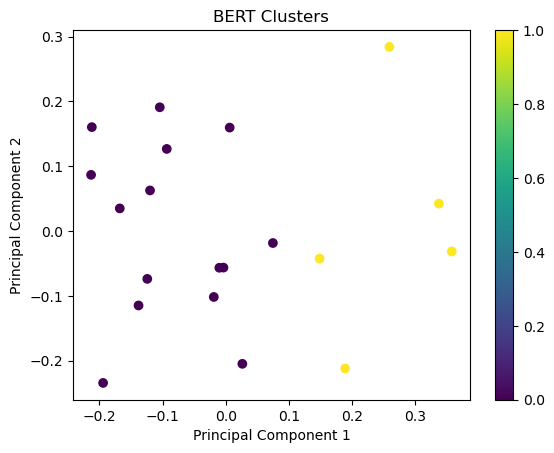

In [46]:
# Perform clustering
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(brt)

# Visualize clusters using PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(brt)
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='viridis')
plt.title('BERT Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()